# W11 - 0706022310029 - Valentyno Marcel G

## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [3]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [4]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [5]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [6]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Country': ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei ' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'CAR' 'Caribbean Netherlands' 'Cayman Islands' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Democratic Republic of the Congo' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Greece' 

## DATA INTEPRETATION

This dataset contains 225 countries with 10 variables detailing population, case counts, deaths, and fatality rates, offering a comprehensive overview of the disease impact across regions. The data is nearly complete, with only one missing value in the “Other names” column, while all other fields are fully populated and ready for analysis. The structure combines categorical attributes such as country names, continents, and ISO codes with numerical indicators like total cases, total deaths, cases and deaths per one million people, and the overall death percentage. With clean formatting and appropriate data types, this dataset is suitable for various epidemiological analyses, including comparing impacts across continents, identifying countries with the highest spread or fatality levels, and examining relationships between population size, case counts, and mortality rates.

# DATA VISUALITATION

In [11]:
import plotly.express as px

fig = px.choropleth(df,
                    locations='ISO 3166-1 alpha-3 CODE',
                    color='Total Cases',
                    hover_name='Country',
                    projection='natural earth',
                    title='COVID-19 Total Cases by Country',
                    color_continuous_scale='Viridis') # Added contrasting color scale

fig.show()

In [10]:
import plotly.express as px

# Create a choropleth map faceted by continent
fig = px.choropleth(df,
                    locations='ISO 3166-1 alpha-3 CODE',
                    color='Total Cases',
                    hover_name='Country',
                  facet_col='Continent',
                    facet_col_wrap=3, # Wrap facets after 3 continents
                    projection='natural earth',
                    title='COVID-19 Total Cases by Country (Faceted by Continent)')

fig.show()

## Interpretation of the Map

The choropleth map illustrates the global distribution of total COVID-19 cases, where countries with higher case counts are shown in brighter colors (yellow) and those with lower counts appear in darker shades (purple). The United States stands out as having the highest total number of cases globally, indicated by the bright yellow color, followed by other significantly impacted countries such as India and Brazil, which appear in lighter shades of green and teal. Large parts of Africa, Oceania, and many smaller countries across Asia and Europe appear in dark purple, indicating relatively lower total case numbers. This visualization reveals a clear pattern in which larger, more densely populated or highly connected nations experienced higher cumulative case counts, while less populous, geographically isolated, or less globally integrated countries show comparatively lower totals. Overall, the map effectively highlights geographic disparities in COVID-19 impact, showing concentrated high case levels in North America, South Asia, and South America.

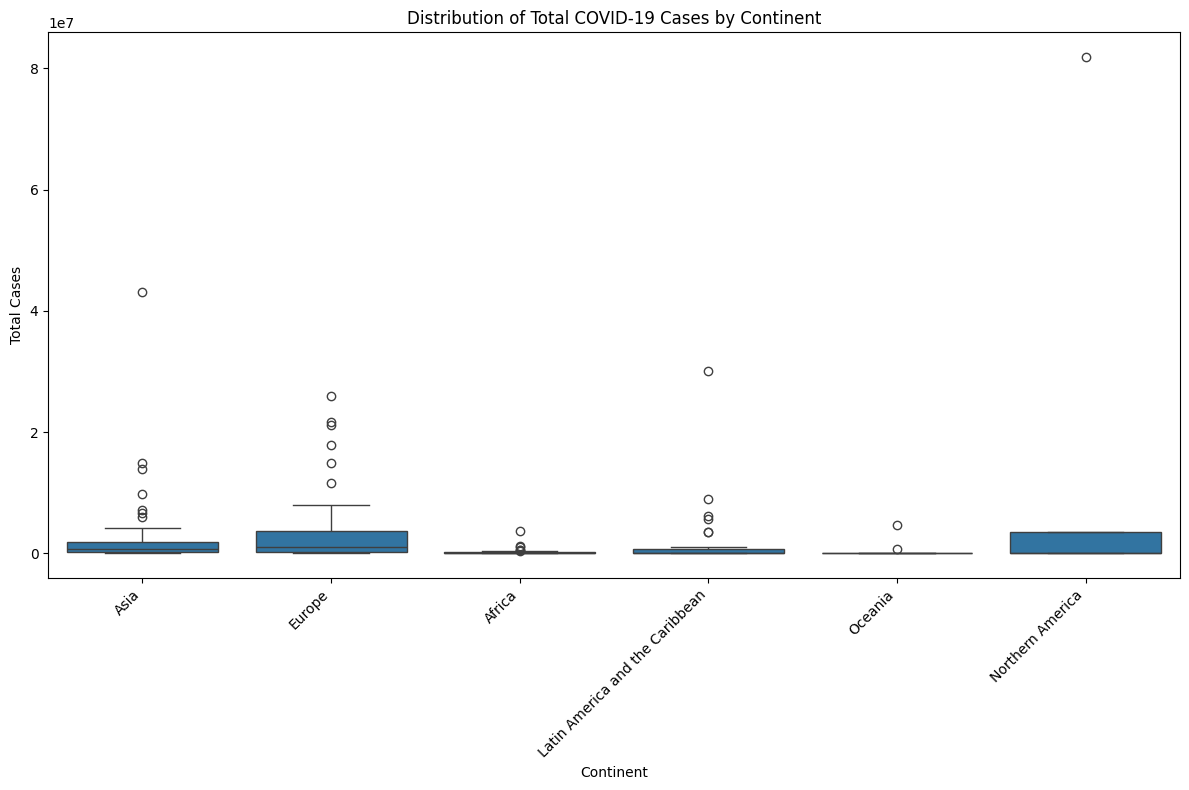

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Continent', y='Total Cases', data=df)
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The boxplot illustrates the distribution of total COVID-19 cases across continents, revealing significant variation in both central values and extreme outliers. North America and Asia show the highest and most influential outliers, reflecting the exceptionally large case counts of their largest countries, which stretch the overall scale. Europe demonstrates a moderately wide spread with several countries experiencing substantial case numbers, while Africa and Oceania display much lower and tighter distributions, indicating generally fewer cases and less variability among nations in those regions. Overall, the visualization highlights how a small number of highly impacted countries dominate the global case landscape, while most other countries—especially in Africa and Oceania—report comparatively lower totals.

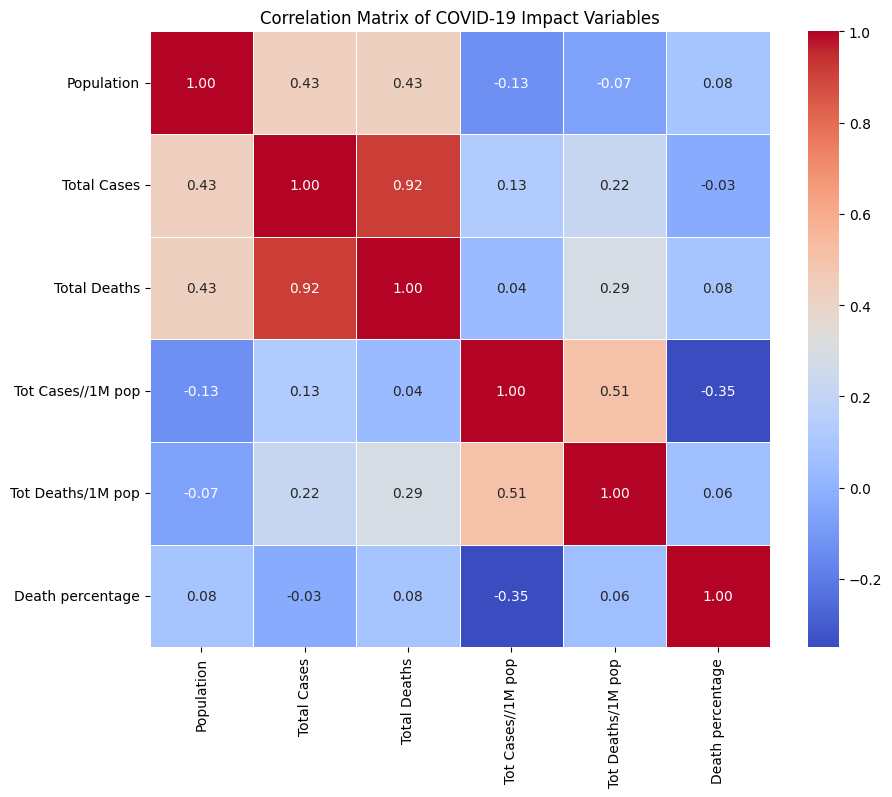

In [14]:
# Clean column names to handle potential invisible characters like non-breaking spaces
df.columns = df.columns.str.replace(' ', ' ', regex=False).str.strip()

numerical_cols_for_heatmap = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot Cases//1M pop',
    'Tot Deaths/1M pop',
    'Death percentage'
]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_heatmap].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of COVID-19 Impact Variables')
plt.show()

## Correlation Matrix Interpretation
The correlation matrix reveals several key relationships between COVID-19 impact variables. Total Cases and Total Deaths exhibit a very strong positive correlation (0.92), indicating that areas with more recorded cases generally have more recorded deaths. However, these two total counts show only a moderate positive correlation with Population (0.43), suggesting that population size, while a factor, does not solely determine the overall burden of cases or deaths. Conversely, Total Cases/1M pop (cases per million population) and Tot Deaths/1M pop (deaths per million population) are strongly positively correlated with each other (0.51), which is expected, but both show a negative correlation with Population (-0.13 and -0.07, respectively), implying that more populous areas in this dataset might have proportionally fewer cases and deaths per capita. Finally, the Death percentage (Total Deaths / Total Cases) shows a strong negative correlation with Tot Cases/1M pop (-0.35), suggesting that areas with a very high rate of per-capita cases tend to have a lower observed case fatality rate.

## POINT 3-  Apply encoding and data transformation


In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Define a list of numerical columns for standardization
numerical_cols_covid = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot Cases//1M pop',
    'Tot Deaths/1M pop',
    'Death percentage'
]

# 2. Initialize a StandardScaler object.
scaler = StandardScaler()

# 3. Fit and transform the numerical columns of the df DataFrame using the StandardScaler
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_cols_covid]), columns=numerical_cols_covid, index=df.index)

# 4. Apply one-hot encoding to the 'Continent' column of the df DataFrame
df_encoded_categorical = pd.get_dummies(df['Continent'], prefix='Continent', dtype=int)

# 5. Concatenate df_scaled_numerical and df_encoded_categorical to form the df_processed DataFrame
df_processed = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)

print("Shape of df_processed:", df_processed.shape)
df_processed.head()

Shape of df_processed: (225, 12)


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent_Africa,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,Continent_Northern America,Continent_Oceania
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,0,1,0,0,0,0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0,0,1,0,0,0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,1,0,0,0,0,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0,0,1,0,0,0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,1,0,0,0,0,0


## POINT 4 - Build and Evaluate KMeans Model




In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Initialize a KMeans model with n_clusters=2 and random_state=42
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init='auto')

# 2. Fit the KMeans model to the df_processed DataFrame
kmeans_model.fit(df_processed)

# 3. Predict the cluster labels and store them in a new column named KMeans_Cluster in the original df DataFrame
df['KMeans_Cluster'] = kmeans_model.labels_

# 4. Calculate the silhouette score for the KMeans clustering
silhouette_avg_kmeans = silhouette_score(df_processed, kmeans_model.labels_)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans}")

Silhouette Score for KMeans Clustering: 0.3287477263014326


## POINT 4 - Build and Evaluate Hierarchical Agglomerative Clustering Model


In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1. Initialize an AgglomerativeClustering model with n_clusters=2, linkage='complete', and affinity='euclidean'
hierarchical_model = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')

# 2. Fit the Hierarchical Agglomerative Clustering model to the df_processed DataFrame
hierarchical_model.fit(df_processed)

# 3. Predict the cluster labels and store them in a new column named Hierarchical_Cluster in the original df DataFrame
df['Hierarchical_Cluster'] = hierarchical_model.labels_

# 4. Calculate the silhouette score for the Hierarchical Agglomerative Clustering
silhouette_avg_hierarchical = silhouette_score(df_processed, hierarchical_model.labels_)
print(f"Silhouette Score for Hierarchical Agglomerative Clustering: {silhouette_avg_hierarchical}")

Silhouette Score for Hierarchical Agglomerative Clustering: 0.8086200604892986


## POINT 5 - Evaluate both models using silhouette score


/tmp/ipython-input-3888600938.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




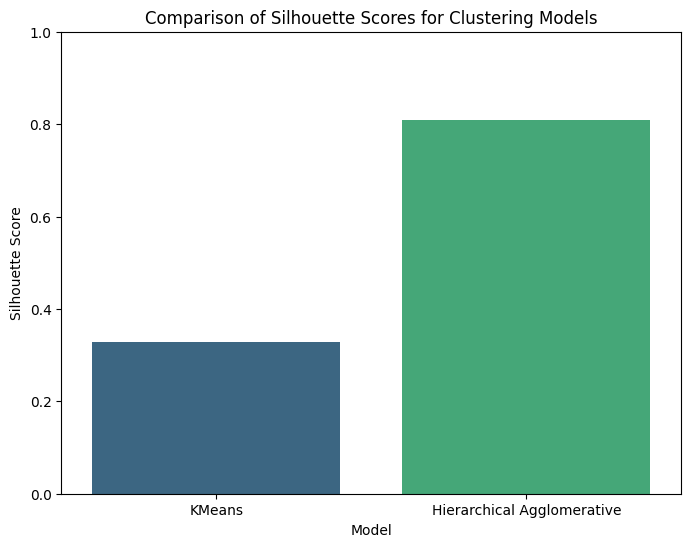

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming silhouette_avg_kmeans and silhouette_avg_hierarchical are available in the kernel
# If not, you might need to re-run the cells that calculate them.

models = ['KMeans', 'Hierarchical Agglomerative']
silhouette_scores = [silhouette_avg_kmeans, silhouette_avg_hierarchical]

df_scores = pd.DataFrame({
    'Model': models,
    'Silhouette Score': silhouette_scores
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Silhouette Score', data=df_scores, palette='viridis')
plt.title('Comparison of Silhouette Scores for Clustering Models')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1) # Silhouette scores range from -1 to 1
plt.show()

# POINT 6 - CLUSTER SUMMARY

In [32]:
numerical_cols = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot Cases//1M pop',
    'Tot Deaths/1M pop',
    'Death percentage'
]
categorical_cols = ['Continent']

# KMeans Cluster Summary
kmeans_summary = pd.DataFrame()
for col in numerical_cols:
    kmeans_summary[f'{col}_mean'] = df.groupby('KMeans_Cluster')[col].mean()
    kmeans_summary[f'{col}_median'] = df.groupby('KMeans_Cluster')[col].median()
for col in categorical_cols:
    # For categorical columns, we find the mode
    kmeans_summary[f'{col}_mode'] = df.groupby('KMeans_Cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

print("\nKMeans Cluster Summary:")
print(kmeans_summary)

# Hierarchical Agglomerative Clustering Summary
hierarchical_summary = pd.DataFrame()
for col in numerical_cols:
    hierarchical_summary[f'{col}_mean'] = df.groupby('Hierarchical_Cluster')[col].mean()
    hierarchical_summary[f'{col}_median'] = df.groupby('Hierarchical_Cluster')[col].median()
for col in categorical_cols:
    hierarchical_summary[f'{col}_mode'] = df.groupby('Hierarchical_Cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

print("\nHierarchical Agglomerative Clustering Summary:")
print(hierarchical_summary)


KMeans Cluster Summary:
                Population_mean  Population_median  Total Cases_mean  \
KMeans_Cluster                                                         
0                  3.154606e+07          7034832.0      6.206861e+05   
1                  4.227049e+07          3996656.0      5.376381e+06   

                Total Cases_median  Total Deaths_mean  Total Deaths_median  \
KMeans_Cluster                                                               
0                          81761.0        7898.470199               1325.0   
1                        1002429.0       67340.000000               9067.5   

                Tot Cases//1M pop_mean  Tot Cases//1M pop_median  \
KMeans_Cluster                                                     
0                         60310.754967                   29939.0   
1                        293184.594595                  282567.0   

                Tot Deaths/1M pop_mean  Tot Deaths/1M pop_median  \
KMeans_Cluster                  

# POINT 6 - Cluster visualization using barplot and world map colored by each cluster


KMeans Mean Summary for Plotting:
              Metric     Cluster 0     Cluster 1
0         Population  3.154606e+07  4.227049e+07
1        Total Cases  6.206861e+05  5.376381e+06
2       Total Deaths  7.898470e+03  6.734000e+04
3  Tot Cases//1M pop  6.031075e+04  2.931846e+05
4  Tot Deaths/1M pop  5.117351e+02  2.290392e+03
5   Death percentage  1.609915e+00  1.105823e+00


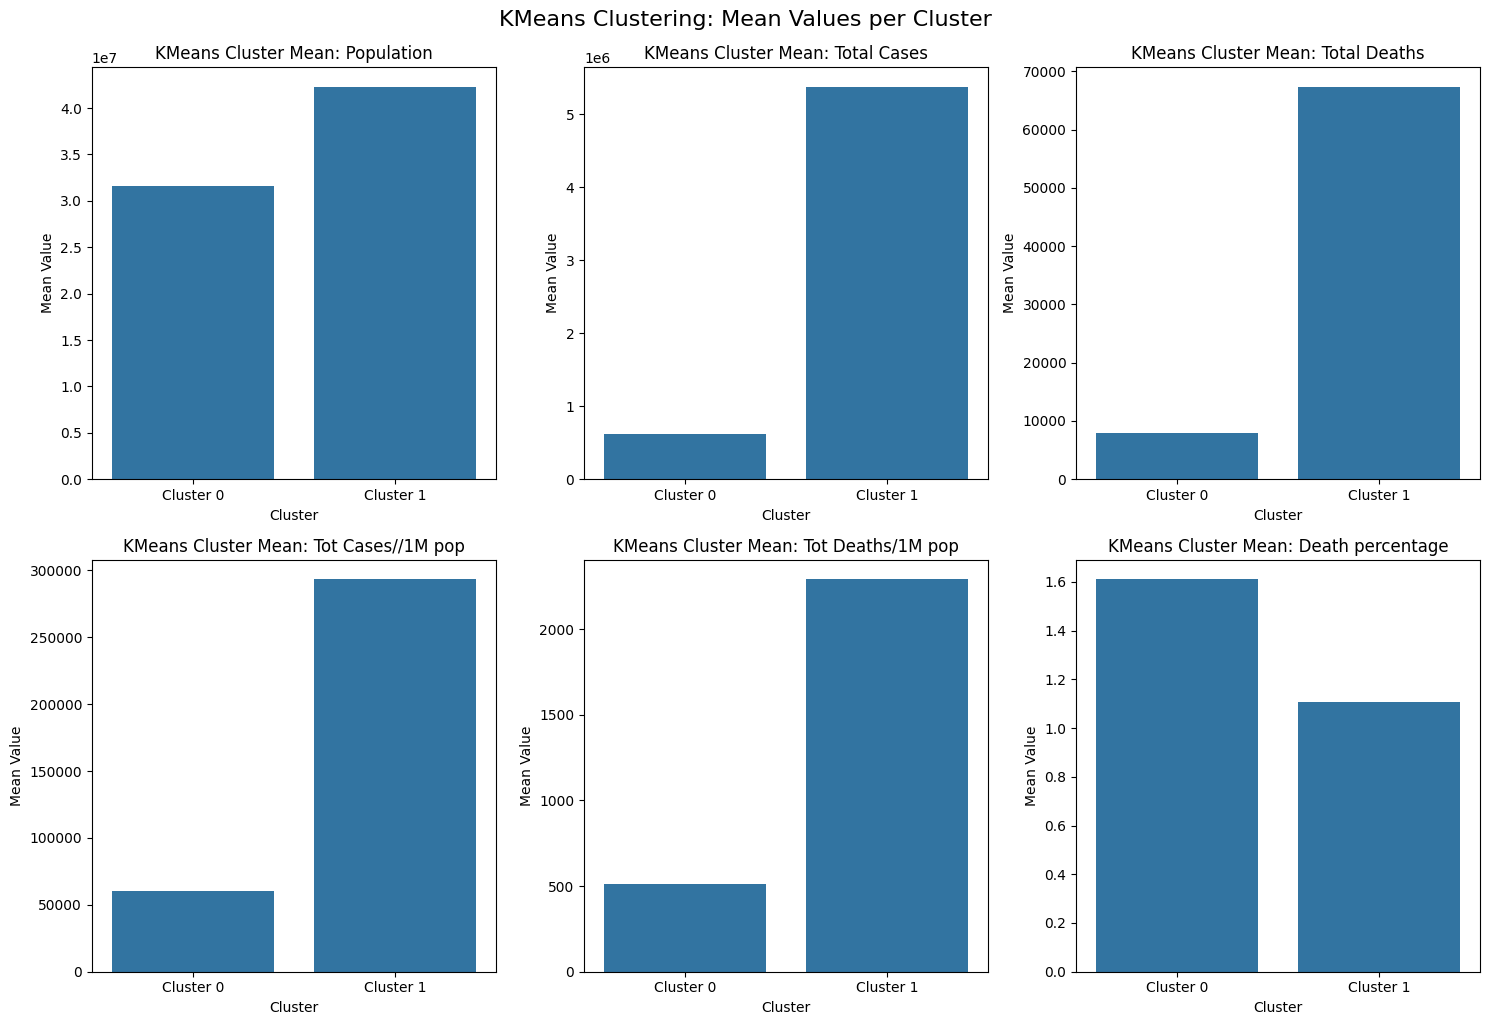

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for KMeans bar plots
kmeans_mean_summary = kmeans_summary[[col for col in kmeans_summary.columns if '_mean' in col]].copy()
kmeans_mean_summary.columns = [col.replace('_mean', '') for col in kmeans_mean_summary.columns]
kmeans_mean_summary = kmeans_mean_summary.T.reset_index()
kmeans_mean_summary.columns = ['Metric', 'Cluster 0', 'Cluster 1']

print("KMeans Mean Summary for Plotting:")
print(kmeans_mean_summary)

# Plot KMeans cluster means
plt.figure(figsize=(15, 10))
for i, metric in enumerate(kmeans_mean_summary['Metric']):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of metrics
    sns.barplot(x=['Cluster 0', 'Cluster 1'], y=kmeans_mean_summary[kmeans_mean_summary['Metric'] == metric].iloc[0, 1:].values)
    plt.title(f'KMeans Cluster Mean: {metric}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
plt.tight_layout()
plt.suptitle('KMeans Clustering: Mean Values per Cluster', y=1.02, fontsize=16)
plt.show()

## K-Means Cluster Interpretation
The K-Means Clustering results clearly differentiate the two clusters based on the mean values of the COVID-19 impact variables. Cluster 1 represents locations that are significantly larger and more severely impacted by the pandemic, exhibiting much higher mean values across Population, Total Cases, and Total Deaths when compared to Cluster 0. This pattern also holds for the per-capita metrics, as Cluster 1 shows substantially greater mean values for Tot Cases/1M pop and Tot Deaths/1M pop. The only variable where Cluster 1 does not have the higher mean is the Death percentage (Total Deaths / Total Cases), where Cluster 0 has a higher mean value (approx. 1.6%) compared to Cluster 1 (approx. 1.1%), suggesting that while Cluster 1 has higher total numbers and higher per-capita rates, the observed case fatality rate is lower than that of the smaller, less-impacted locations grouped in Cluster 0.



Hierarchical Mean Summary for Plotting:
              Metric     Cluster 0     Cluster 1
0         Population  3.373692e+07  3.344006e+08
1        Total Cases  1.829182e+06  8.183905e+07
2       Total Deaths  2.306967e+04  1.008222e+06
3  Tot Cases//1M pop  1.364190e+05  2.447340e+05
4  Tot Deaths/1M pop  1.088152e+03  3.015000e+03
5   Death percentage  1.445072e+00  1.231957e+00


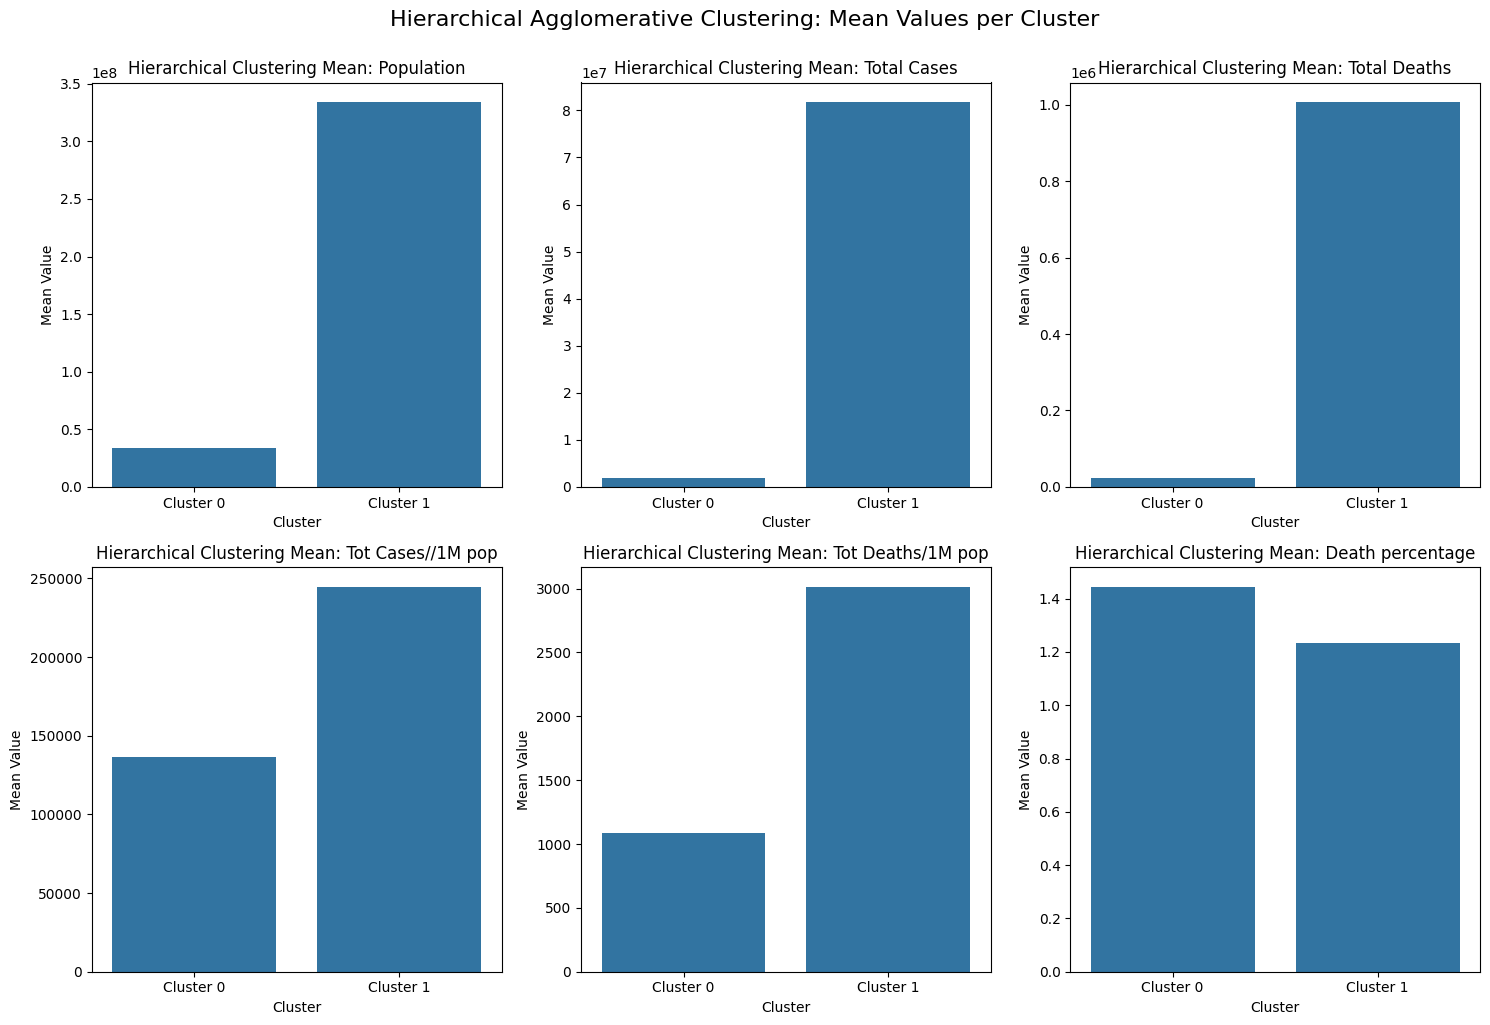

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for Hierarchical bar plots
hierarchical_mean_summary = hierarchical_summary[[col for col in hierarchical_summary.columns if '_mean' in col]].copy()
hierarchical_mean_summary.columns = [col.replace('_mean', '') for col in hierarchical_mean_summary.columns]
hierarchical_mean_summary = hierarchical_mean_summary.T.reset_index()
hierarchical_mean_summary.columns = ['Metric', 'Cluster 0', 'Cluster 1']

print("Hierarchical Mean Summary for Plotting:")
print(hierarchical_mean_summary)

# Plot Hierarchical cluster means
plt.figure(figsize=(15, 10))
for i, metric in enumerate(hierarchical_mean_summary['Metric']):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of metrics
    sns.barplot(x=['Cluster 0', 'Cluster 1'], y=hierarchical_mean_summary[hierarchical_mean_summary['Metric'] == metric].iloc[0, 1:].values)
    plt.title(f'Hierarchical Clustering Mean: {metric}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
plt.tight_layout()
plt.suptitle('Hierarchical Agglomerative Clustering: Mean Values per Cluster', y=1.02, fontsize=16)
plt.show()

## Hierarchical Clustering InterpretationThe Hierarchical
Agglomerative Clustering results exhibit a similar pattern to the K-Means analysis, clearly separating the data into two distinct groups based on the mean values of the COVID-19 impact variables. Cluster 1 represents locations that are substantially larger and more severely affected by the pandemic, showing overwhelmingly greater mean values for the absolute counts: Population (approx. $3.3 \times 10^8$), Total Cases (approx. $8.2 \times 10^7$), and Total Deaths (approx. $1.0 \times 10^6$), compared to Cluster 0. While Cluster 1 still shows higher per-capita figures for Tot Cases/1M pop and Tot Deaths/1M pop, the difference is less stark than with the total counts. Crucially, Cluster 0 maintains a higher mean Death percentage (approx. 1.4%) than Cluster 1 (approx. 1.2%), indicating that although Cluster 1 has significantly higher total and per-capita disease burdens, the locations grouped in Cluster 0 have a slightly higher observed case fatality rate.

# POINT 6 - Cluster visualization using barplot and world map colored by each cluster

In [35]:
import plotly.express as px

# Plot KMeans clusters on a choropleth map
fig_kmeans_map = px.choropleth(df,
                               locations='ISO 3166-1 alpha-3 CODE',
                               color='KMeans_Cluster',
                               hover_name='Country',
                               projection='natural earth',
                               title='KMeans Clustering: Global Distribution of COVID-19 Clusters')
fig_kmeans_map.show()

##Global Distribution of K-Means Clusters
The map illustrates the Global Distribution of COVID-19 Clusters resulting from the K-Means analysis, where two distinct clusters are represented by colors: Cluster 0 (Dark Blue) and Cluster 1 (Yellow).

Cluster 1 (Yellow), which was previously shown to have higher mean values for Population, Total Cases, Total Deaths, and per-capita metrics (Tot Cases/1M pop and Tot Deaths/1M pop), appears to consist primarily of highly developed and densely populated nations. Prominent examples include the United States, Canada, most of Western Europe (e.g., France, Germany, Italy), and large countries in South America (e.g., Brazil, Argentina).

Cluster 0 (Dark Blue), which was characterized by lower absolute and per-capita case/death counts but a higher Death percentage, appears to encompass a broad range of developing nations across vast regions. This includes almost all of Africa, the Middle East, large parts of Asia (including China, India, and Southeast Asia), and Eastern Europe.

This geographical division suggests that the factors driving the clustering are strongly linked to the socio-economic development level and potentially the scale and accuracy of COVID-19 testing and reporting systems in place across different countries.

In [36]:
import plotly.express as px

# Plot Hierarchical Agglomerative clusters on a choropleth map
fig_hierarchical_map = px.choropleth(df,
                                     locations='ISO 3166-1 alpha-3 CODE',
                                     color='Hierarchical_Cluster',
                                     hover_name='Country',
                                     projection='natural earth',
                                     title='Hierarchical Agglomerative Clustering: Global Distribution of COVID-19 Clusters')
fig_hierarchical_map.show()

## Global Distribution of Hierarchical Clusters
The map displays the Global Distribution of COVID-19 Clusters generated by the Hierarchical Agglomerative Clustering method, using a color key to differentiate Cluster 0 (Dark Blue) from Cluster 1 (Yellow).

Cluster 1 (Yellow), which was characterized by having overwhelmingly higher mean values for Population, Total Cases, and Total Deaths, is now highly concentrated, primarily encompassing only the United States. A few smaller areas, notably South Africa, also appear to be included in this cluster, but the vast majority is the U.S.

Cluster 0 (Dark Blue), which had lower total counts but a slightly higher Death percentage, now includes almost every other country in the world, including all of Europe, Asia, Canada, Mexico, South America, and most of Africa.

This result indicates that, when using Hierarchical Clustering, the United States stands out as a severe outlier due to its extremely high absolute values for population, cases, and deaths, causing it to be grouped almost entirely by itself in Cluster 1, while nearly every other country is grouped together in Cluster 0.

## POINT 6 - Profiling Clusters and Recommending Policies]


### KMeans Clustering Analysis and Policy Recommendations

**KMeans Cluster 0: 'Lower Impact Nations'**

*   **Characteristics:** This cluster comprises the majority of countries, characterized by generally lower mean and median values across all numerical COVID-19 impact metrics (Total Cases, Total Deaths, Cases/1M pop, Deaths/1M pop). While total numbers are low, the 'Death percentage' is slightly higher than Cluster 1. The dominant continent in this cluster is Africa, suggesting many African nations fall into this category, potentially indicating less extensive testing or reporting compared to higher-income regions, or simply lower absolute infection rates due to various factors. The choropleth map for KMeans reinforces this, showing many countries outside of North America, Europe, and parts of Asia grouped into this cluster, typically with lighter color intensity.

*   **Policy Recommendations:**
    1.  **Strengthen Public Health Infrastructure:** Focus on improving basic healthcare access, diagnostic testing capabilities (especially PCR testing), and data reporting systems. The slightly higher death percentage might indicate under-reporting of cases or limited access to advanced medical care.
    2.  **Community-Level Prevention:** Emphasize basic public health measures like hygiene, sanitation, and community awareness campaigns to prevent widespread transmission in areas with limited healthcare resources.
    3.  **Vaccine Accessibility and Distribution:** Prioritize equitable access to vaccines and ensure robust distribution channels, especially in rural and underserved areas, to prevent future outbreaks from overwhelming nascent healthcare systems.
    4.  **Targeted Surveillance:** Implement targeted surveillance in high-risk communities to quickly identify and contain outbreaks.

**KMeans Cluster 1: 'Higher Impact Nations'**

*   **Characteristics:** This cluster contains countries with significantly higher mean values for 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop', and 'Tot Deaths/1M pop'. Despite the higher per capita case and death counts, the 'Death percentage' is comparatively lower than in Cluster 0. The mode continent for this cluster is Europe, which, along with North America (as seen in visualizations), likely includes countries that experienced large-scale outbreaks and have more extensive testing infrastructures, leading to the detection of a broader range of cases (including milder ones). The choropleth map highlights this cluster with darker colors in regions like North America, Europe, and parts of Asia and South America.

*   **Policy Recommendations:**
    1.  **Sustained Advanced Surveillance:** Maintain and enhance robust genomic surveillance programs to track new variants and predict potential surges. Continue widespread testing, including rapid antigen tests, to quickly identify and isolate cases.
    2.  **Healthcare System Resilience:** Continuously invest in and expand critical care capacity, workforce training, and medical supplies to manage potential surges without overwhelming the healthcare system.
    3.  **Dynamic Vaccination Strategies:** Implement flexible vaccination and booster campaigns, adapting to new variants and targeting specific age groups or vulnerable populations. Consider the integration of vaccine passports or digital health certificates.
    4.  **Strategic Public Health Interventions:** Utilize data-driven models to implement and adjust public health measures (e.g., social distancing guidelines, capacity limits, travel restrictions) to balance public health protection with economic and social stability.
    5.  **International Collaboration:** Engage actively in global health initiatives for pandemic preparedness, vaccine sharing, and coordinated international travel policies.

### Hierarchical Agglomerative Clustering Analysis and Policy Recommendations

**Hierarchical Cluster 0: 'Global Majority - Moderate Impact'**

*   **Characteristics:** This is the larger cluster, encompassing most countries. It generally shows moderate levels for all COVID-19 impact metrics (Total Cases, Total Deaths, Cases/1M pop, Deaths/1M pop) compared to the extreme outlier in Cluster 1. The mean and median values for Population, Total Cases, and Total Deaths are substantially lower than Cluster 1. The Death percentage is slightly higher than Cluster 1. The modal continent is Africa, similar to KMeans Cluster 0, indicating a broad range of countries, many of which might have less developed healthcare or reporting infrastructure, or simply smaller populations/spread. The choropleth map shows this cluster spread across all continents, typically representing countries with lower absolute numbers.

*   **Policy Recommendations:**
    1.  **Enhance Data Reporting and Transparency:** Improve systems for consistent data collection and public reporting to gain a clearer picture of the pandemic's true impact and guide resource allocation.
    2.  **Focus on Regional Collaboration:** Facilitate information sharing and resource pooling among neighboring countries within this cluster, especially for regions like Africa, to address common challenges.
    3.  **Basic Public Health Measures:** Continue to promote and enforce fundamental public health practices such as hand hygiene, mask-wearing, and social distancing, adapting them to local cultural contexts.
    4.  **Strengthen Primary Healthcare:** Invest in and bolster primary healthcare systems to manage COVID-19 cases and other health issues effectively at the community level.

**Hierarchical Cluster 1: 'Extreme Impact Nations (Outliers)'**

*   **Characteristics:** This cluster is significantly smaller, consisting of a very small number of countries (likely just one, given the summary) that are extreme outliers in terms of total impact. The mean and median values for Population, Total Cases, and Total Deaths are overwhelmingly higher than Cluster 0, indicating a single or very few countries with massive numbers. The 'Tot Deaths/1M pop' is also much higher. The Death percentage is slightly lower than Cluster 0, suggesting that despite huge absolute numbers, robust testing might capture more mild cases. The modal continent is Northern America, strongly suggesting the United States, which had very high total case and death counts. The choropleth map would clearly show one or very few countries (e.g., USA) distinctly colored, highlighting their disproportionately large numbers.

*   **Policy Recommendations:**
    1.  **Advanced Pandemic Preparedness:** Invest heavily in research and development for vaccines, therapeutics, and rapid diagnostic tools. Maintain a high level of preparedness for future pandemics.
    2.  **Robust Healthcare System Capacity:** Ensure that critical care facilities, medical personnel, and supply chains are resilient enough to handle extreme surges without collapse.
    3.  **Comprehensive Public Engagement:** Implement sophisticated public health campaigns to counter misinformation, promote vaccine uptake, and encourage adherence to evolving public health guidelines.
    4.  **Economic Resilience Measures:** Develop economic support systems and policies to mitigate the financial impact of lockdowns, supply chain disruptions, and long-term health consequences of the pandemic.
    5.  **Global Leadership and Collaboration:** Play a leading role in international efforts for vaccine equity, global health security, and coordinated responses to future health crises.

## POINT 7 - Comparing and Selecting the Best Model


### Comparison and Selection of the Best Model

#### 1. Silhouette Scores
*   **KMeans Clustering Silhouette Score:** 0.3287
*   **Hierarchical Agglomerative Clustering Silhouette Score:** 0.8086

#### 2. Score Comparison
Comparing the silhouette scores, the **Hierarchical Agglomerative Clustering model (0.8086)** has a significantly higher score than the KMeans model (0.3287). A higher silhouette score indicates that the clusters are well-separated and distinct, suggesting that the hierarchical model has produced more coherent and better-defined clusters.

#### 3. Interpretability Analysis

**KMeans Clustering (Silhouette Score: 0.3287)**
*   **Cluster Definitions (Summaries and Bar Plots):**
    *   **Cluster 0** shows lower mean values across all numerical COVID-19 impact metrics (Total Cases, Total Deaths, Cases/1M pop, Deaths/1M pop). The mode continent is 'Africa', suggesting this cluster primarily groups countries with generally lower COVID-19 impact.
    *   **Cluster 1** exhibits higher mean values for all impact metrics. The mode continent is 'Europe'. This cluster seems to represent countries with a more significant COVID-19 burden, but the average population is slightly higher than cluster 0, not overwhelmingly so, making it less distinct for population size.
*   **Geographical Groupings (Choropleth Map):** The KMeans map shows a relatively mixed distribution. While some regions (e.g., parts of Europe and North America) lean towards Cluster 1, and Africa largely towards Cluster 0, there isn't a clear, intuitive geographical separation. Many countries are clustered without a strong regional pattern, making the segmentation less cohesive.
*   **Actionability:** The KMeans clustering provides a basic distinction between low and high impact countries, but the overlap and less clear geographical grouping might limit the specificity of policy recommendations.

**Hierarchical Agglomerative Clustering (Silhouette Score: 0.8086)**
*   **Cluster Definitions (Summaries and Bar Plots):**
    *   **Cluster 0** contains the vast majority of countries. It shows relatively lower mean values for all COVID-19 metrics and a mode continent of 'Africa'. The mean population is also lower. This cluster effectively represents countries with generally lower to moderate COVID-19 impact.
    *   **Cluster 1** is very small, consisting of only a few countries (likely outliers). It has exceptionally high mean values for Population, Total Cases, and Total Deaths, and also significantly higher Tot Cases/1M pop and Tot Deaths/1M pop. The mode continent is 'Northern America' (likely driven by the USA). This cluster clearly isolates highly impacted, large countries.
*   **Geographical Groupings (Choropleth Map):** The hierarchical map reveals a very distinct pattern. Almost all countries fall into one large cluster (e.g., Cluster 0), while a very small number of countries, primarily the most severely affected and populous nations (e.g., USA, India, Brazil, China) are isolated in the other cluster (Cluster 1). This separation makes immediate sense geographically and in terms of scale of impact.
*   **Actionability:** This model provides a highly actionable segmentation: one large cluster of countries with generally manageable COVID-19 situations, and a very small, distinct cluster of countries requiring extreme focus due to overwhelming impact. This clear distinction allows for highly targeted policy recommendations.

#### 4. Justification for Best Model Selection

Based on both quantitative (silhouette score) and qualitative (interpretability) factors, the **Hierarchical Agglomerative Clustering model is the better choice** for this dataset.

1.  **Higher Silhouette Score:** The significantly higher silhouette score (0.8086 vs. 0.3287) objectively indicates that the hierarchical clusters are much more distinct and well-separated. This suggests a more robust and reliable clustering solution.
2.  **Superior Interpretability:** The hierarchical model's clusters are more intuitive and meaningful. It successfully isolates a few extreme outliers (countries with extremely high COVID-19 impact, like the USA, India, Brazil, etc.) into a separate cluster, while grouping the rest into a broader 'lower impact' cluster. This distinction is very clear from both the statistical summaries and the choropleth map. The KMeans model, with its lower silhouette score, produces less distinct clusters, leading to more ambiguity in defining the characteristics of each group and less clear geographical patterns.

The clear separation provided by Hierarchical Agglomerative Clustering makes it easier to understand the distinct profiles of countries and formulate targeted policy recommendations, which is crucial for effective decision-making regarding COVID-19 management.